In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 87.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:

import pandas as pd
from transformers import AutoTokenizer
import pandas as pd

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import string
import pandas as pd
import warnings
from nltk.tokenize import word_tokenize
warnings.filterwarnings("ignore")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt")
nltk.download("omw-1.4")
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

df = pd.read_csv('/content/labeled_data.csv',delimiter=',')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
df.head(10)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,6,3,0,3,0,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ..."
9,9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


In [ ]:
df.drop(['Unnamed: 0','count'],axis=1,inplace=True)
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

,0
hate_speech,0
offensive_language,0
neither,0
class,0
tweet,0


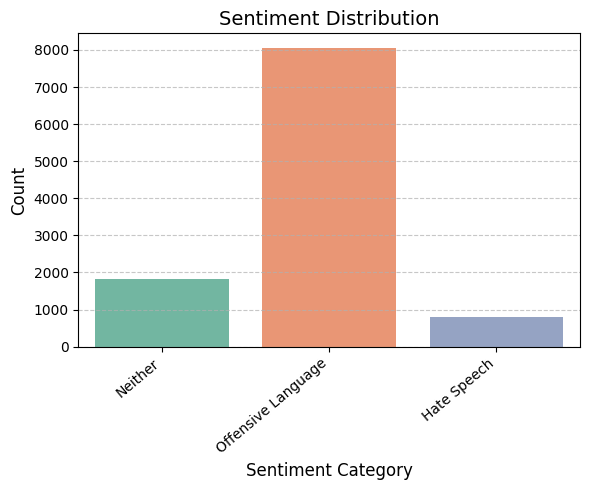

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapping sentiment classes
df['sentiment'] = df['class'].map({0: 'Hate Speech', 1: 'Offensive Language', 2: 'Neither'})

# Plotting
fig, axs = plt.subplots(figsize=(6, 5))
sns.countplot(x='sentiment', data=df, ax=axs, palette="Set2")

# Customizing the plot
axs.set_title("Sentiment Distribution", fontsize=14)
axs.set_xlabel("Sentiment Category", fontsize=12)
axs.set_ylabel("Count", fontsize=12)
axs.set_xticklabels(axs.get_xticklabels(), rotation=40, ha="right", fontsize=10)
axs.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
def clean_text(text):

    text = str(text).lower()

    text = re.sub('<.*?>+', '',text)

    text = re.sub('https?://\S+|www\.\S+', '', text)

    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('rt', '',text)
    text = re.sub('\d', '',text)
    text = re.sub('\w*\d\w*', '', text)

    text = re.sub('  ',' ',text)



    return text


df['tweet'] = df['tweet'].apply(clean_text)
df['tweet'].head(10)

,tweet
0,mayasolovely as a woman you shouldnt complain...
1,mleew boy dats coldtyga dwn bad for cuffin da...
2,urkindofbrand dawg sbabylife you ever fuck a ...
3,cganderson vivabased she look like a tranny
4,shenikarobes the shit you hear about me might...
5,tmadisonx the shit just blows meclaim you so f...
6,brighterdays i can not just sit up and hate on...
7,selfiequeenbri cause im tired of you big bitch...
8,amp you might not get ya bitch back amp thats...
9,rhythmixx hobbies include fighting mariam\n\n...


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import string
import pandas as pd
import warnings
from nltk.tokenize import word_tokenize
warnings.filterwarnings("ignore")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt")
nltk.download("omw-1.4")
# Download the punkt_tab model
nltk.download('punkt_tab') # This line is added to download the necessary model.

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

df = pd.read_csv('/content/labeled_data.csv',delimiter=',')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
text = " ".join(i for i in df['tweet'])

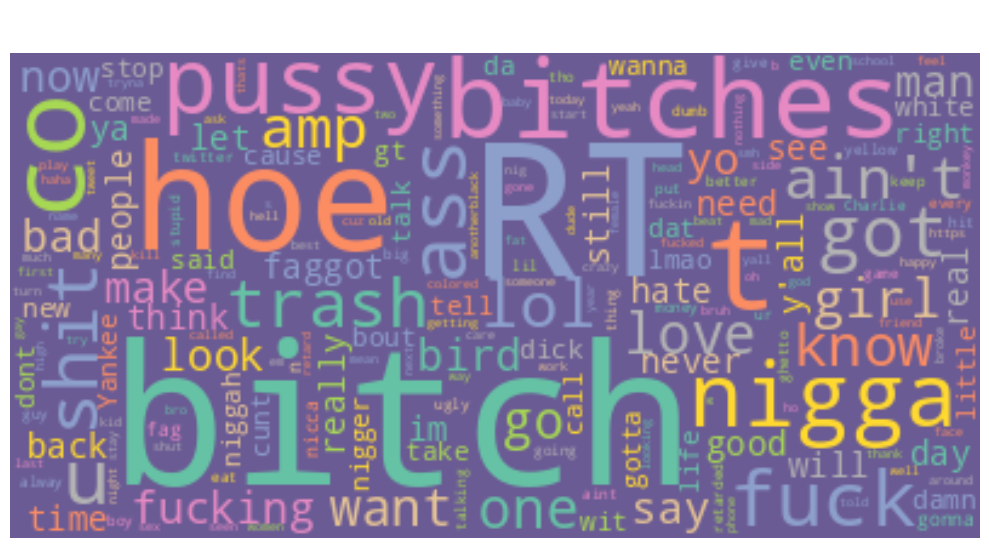

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generating the WordCloud
wordcloud = WordCloud(
    background_color="#6B5B95",  # Purple background
    colormap="Set2",  # Soft pastel color palette
    collocations=False,  # Avoid duplicate phrases
    max_font_size=80  # Limit the maximum font size
).generate(text)

# Plotting the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Bad Tweets By Bad People", fontsize=16, pad=20, color="white")
plt.tight_layout()  # Ensures proper spacing
plt.show()


In [ ]:
print(text.count("bitch"))
print(text.count("bitches"))
print(text.count("nigga"))
print(text.count("niggas"))
print(text.count("hoe"))
print(text.count("trash"))
print(text.count("pussy"))
print(text.count("fuck"))
print(text.count("fucking"))
print(text.count("love"))
print(text.count("faggot"))

11303
3018
2173
652
4398
1176
2149
2329
591
813
541


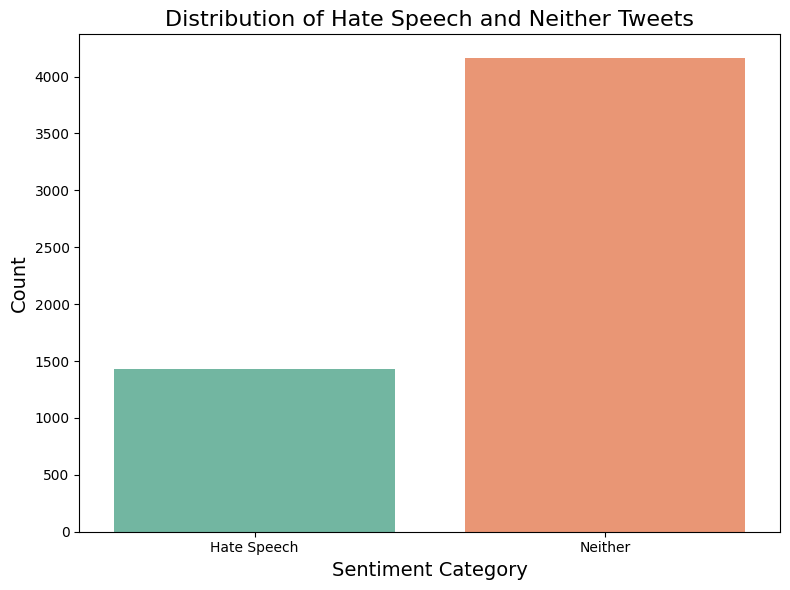

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapping sentiment classes
df['sentiment'] = df['class'].map({0: 'Hate Speech', 1: 'Offensive Language', 2: 'Neither'})

# Create binary columns based on conditions
Hate_tweet = (df['sentiment'] == "Hate Speech").astype('int32')
neither = (df['sentiment'] == "Neither").astype('int32')

# Combine the data into a single DataFrame for plotting
binary_sentiments = {
    'Hate Speech': Hate_tweet.sum(),
    'Neither': neither.sum()
}
sentiment_df = pd.DataFrame(list(binary_sentiments.items()), columns=['Sentiment', 'Count'])

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='Sentiment', y='Count', data=sentiment_df, palette='Set2')

# Adding labels and title
plt.title("Distribution of Hate Speech and Neither Tweets", fontsize=16)
plt.xlabel("Sentiment Category", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

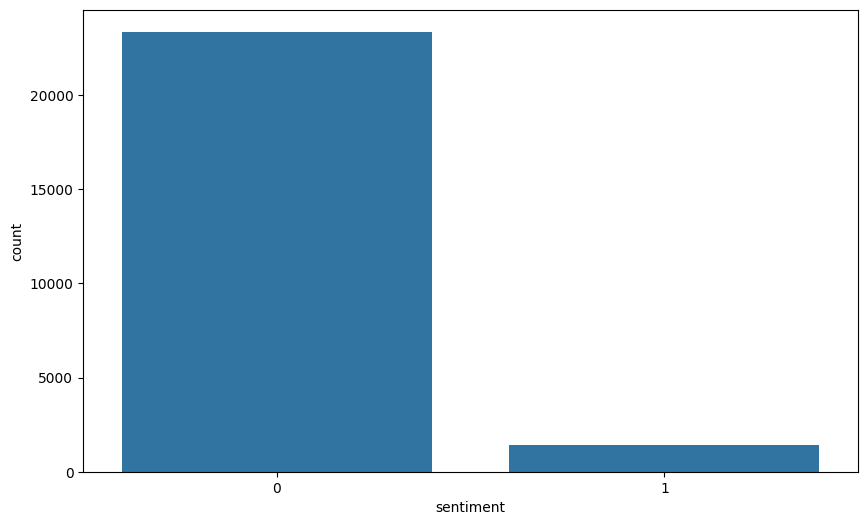

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x=Hate_tweet)
plt.xticks()
plt.show()

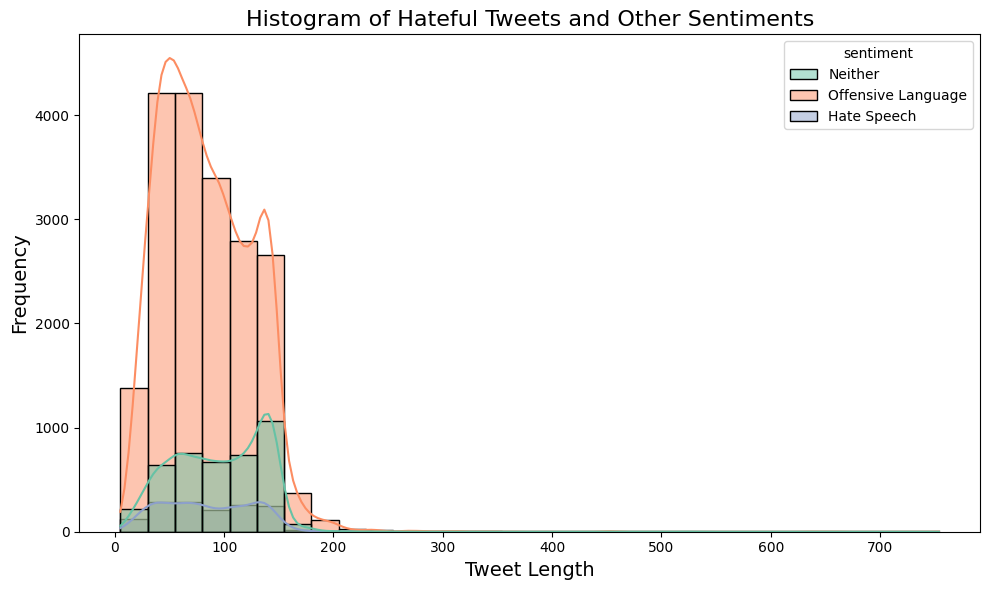

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the length of tweets
df['length_of_hate'] = df['tweet'].apply(len)

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(x='length_of_hate', hue='sentiment', data=df, kde=True, palette='Set2', bins=30)

# Adding title and labels
plt.title('Histogram of Hateful Tweets and Other Sentiments', fontsize=16)
plt.xlabel('Tweet Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split # Import the necessary function
X = df['tweet']
y = df['class']


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.15, random_state=42)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Embedding, Dense,SpatialDropout1D,Bidirectional
from tensorflow.keras.utils import to_categorical


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

tokenizer = Tokenizer()

tokenizer.fit_on_texts(X_train)

In [ ]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

max_length = 0
for sequence in X_train:
    sequence_length = len(sequence)
    if sequence_length > max_length:
        max_length = sequence_length


print(max_length)

78


In [ ]:
from tensorflow.keras.utils import pad_sequences

X_train = pad_sequences(X_train,maxlen=max_length,padding='post')
X_test = pad_sequences(X_test,maxlen=max_length,padding='post')

In [ ]:
RNN = Sequential()
# Get word_index from the tokenizer
word_index = tokenizer.word_index
RNN.add(Embedding(len(word_index) + 1, output_dim=25, input_length=max_length)) # Also change input_length to max_length
RNN.add(SpatialDropout1D(0.2))
RNN.add(Bidirectional(LSTM(25, dropout=0.2,recurrent_dropout=0.2)))
RNN.add(Dense(3, activation='sigmoid'))
RNN.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
batch_size = 64

history = RNN.fit(X_train,y_train,batch_size=batch_size,epochs=10,validation_split=0.1)
results = RNN.evaluate(X_test,y_test)
pred = RNN.predict(X_test)
print(results)
print("Max Accuracy: ",max(history.history['accuracy']))
print("Max vallidation accuracy: ",max(history.history['val_accuracy']))

Epoch 1/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 32s 88ms/step - accuracy: 0.7734 - loss: 0.6860 - val_accuracy: 0.8904 - val_loss: 0.3394
Epoch 2/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 25s 83ms/step - accuracy: 0.8959 - loss: 0.3245 - val_accuracy: 0.9079 - val_loss: 0.2985
Epoch 3/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 43s 91ms/step - accuracy: 0.9167 - loss: 0.2621 - val_accuracy: 0.9065 - val_loss: 0.2979
Epoch 4/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 39s 83ms/step - accuracy: 0.9307 - loss: 0.2120 - val_accuracy: 0.9070 - val_loss: 0.3130
Epoch 5/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 26s 89ms/step - accuracy: 0.9475 - loss: 0.1654 - val_accuracy: 0.9022 - val_loss: 0.3313
Epoch 6/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 26s 87ms/step - accuracy: 0.9636 - loss: 0.1254 - val_accuracy: 0.8942 - val_loss: 0.3825
Epoch 7/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.9698 - loss: 0.0940 - val_accuracy: 0.8927 - val_loss: 0.3938
Epoch 8/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 26s 87ms/step - accuracy: 0.9772 - loss: 0.0750 - 

Epoch 1/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 34s 88ms/step - accuracy: 0.7699 - loss: 0.6753 - val_accuracy: 0.8899 - val_loss: 0.3345
Epoch 2/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 27s 90ms/step - accuracy: 0.8980 - loss: 0.3289 - val_accuracy: 0.9089 - val_loss: 0.2954
Epoch 3/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 41s 92ms/step - accuracy: 0.9191 - loss: 0.2608 - val_accuracy: 0.9051 - val_loss: 0.3032
Epoch 4/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 42s 94ms/step - accuracy: 0.9286 - loss: 0.2167 - val_accuracy: 0.8999 - val_loss: 0.3348
Epoch 5/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 28s 94ms/step - accuracy: 0.9389 - loss: 0.1787 - val_accuracy: 0.8856 - val_loss: 0.3827
Epoch 6/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 41s 93ms/step - accuracy: 0.9549 - loss: 0.1451 - val_accuracy: 0.8780 - val_loss: 0.4373
Epoch 7/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 26s 87ms/step - accuracy: 0.9594 - loss: 0.1249 - val_accuracy: 0.8752 - val_loss: 0.4535
Epoch 8/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 42s 92ms/step - accuracy: 0.9718 - loss: 0.0914 - 

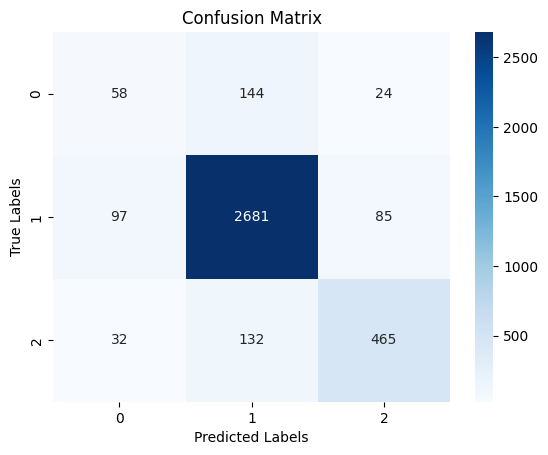

[0.6093652844429016, 0.8617536425590515]
Max Training Accuracy:  0.9821711182594299
Max Validation Accuracy:  0.9088751673698425


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- RNN Model ---
RNN = Sequential()
word_index = tokenizer.word_index
RNN.add(Embedding(len(word_index) + 1, output_dim=25, input_length=max_length))
RNN.add(SpatialDropout1D(0.2))
RNN.add(Bidirectional(LSTM(25, dropout=0.2, recurrent_dropout=0.2)))
RNN.add(Dense(3, activation='sigmoid'))
RNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# --- Training the model ---
batch_size = 64
history = RNN.fit(X_train, y_train, batch_size=batch_size, epochs=10, validation_split=0.1)

# --- Evaluating the model ---
results = RNN.evaluate(X_test, y_test)
pred_prob = RNN.predict(X_test)

# Convert predicted probabilities to class labels
y_pred = np.argmax(pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)  # Assuming `y_test` is one-hot encoded

# --- Evaluation Metrics ---
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    return accuracy, precision, recall, f1

# --- Plot Confusion Matrix ---
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

# --- Metrics Calculation ---
accuracy, precision, recall, f1 = calculate_metrics(y_true, y_pred)

# --- Confusion Matrix ---
class_names = [0, 1, 2]  # Changed from ['Hate_Speech', 'Offensive_Language', 'Neither']
plot_confusion_matrix(y_true, y_pred, class_names)


# --- Print Results ---
print(results)
print("Max Training Accuracy: ", max(history.history['accuracy']))
print("Max Validation Accuracy: ", max(history.history['val_accuracy']))


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# Function to remove stopwords from text
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Function to clean input text
def clean_text_for_input(text):
    text = str(text).lower()
    text = re.sub('<.*?>+', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('rt', '', text)
    text = re.sub('\d', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('  ', ' ', text)
    return text

# Function to preprocess and predict a new text input
def predict_text(text, model, tokenizer, max_length):
    # Clean the input text
    text = clean_text_for_input(text)
    text = remove_stopwords(text) # Now calling the defined remove_stopwords function

    # Tokenize and pad the input text to match the input shape of the LSTM model
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')

    # Make a prediction
    prediction = model.predict(padded_sequence)

    # Convert the prediction to a label
    predicted_class = np.argmax(prediction, axis=1)

    # Map the predicted class to its sentiment label
    sentiment_map = {0: "Hate_Speech", 1: "Offensive_Language", 2: "Neither"}
    predicted_sentiment = sentiment_map[predicted_class[0]]

    return predicted_sentiment

# Example usage of the function
random_text = "welcome"
predicted_sentiment = predict_text(random_text, RNN, tokenizer, max_length)
print(f"Predicted Sentiment: {predicted_sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Sentiment: Neither


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!pip install SpeechRecognition
!pip install pydub # Install pydub library
!pip install moviepy # Install MoviePy library

import os
from pydub import AudioSegment
from pydub.silence import split_on_silence
import moviepy.editor as mp # Import MoviePy
import speech_recognition as sr

def audio_to_text(audio_file):
    """Transcribes audio from a file using SpeechRecognition."""
    r = sr.Recognizer()
    with sr.AudioFile(audio_file) as source:
        audio_data = r.record(source)
        try:
            text = r.recognize_google(audio_data)
            return text
        except sr.UnknownValueError:
            print("Could not understand audio")
            return ""
        except sr.RequestError as e:
            print(f"Could not request results from Google Speech Recognition service; {e}")
            return ""

# --- Step 1: Split audio into chunks ---
def split_audio_into_chunks(audio_file, min_silence_len=1000, silence_thresh=-40):
    audio = AudioSegment.from_wav(audio_file)

    # Split audio where silence is longer than `min_silence_len` and silence threshold is below `silence_thresh`
    chunks = split_on_silence(
        audio,
        min_silence_len=min_silence_len,
        silence_thresh=silence_thresh
    )

    return chunks

# --- Step 2: Save audio chunks with timestamps ---
def save_audio_chunks(chunks, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    chunk_files = []
    start_time = 0

    for i, chunk in enumerate(chunks):
        chunk_file = os.path.join(output_dir, f"chunk_{i}.wav")
        chunk.export(chunk_file, format="wav")

        # Calculate end time of this chunk
        duration = len(chunk) / 1000  # Convert ms to seconds
        end_time = start_time + duration

        chunk_files.append((chunk_file, start_time, end_time))
        start_time = end_time

    return chunk_files

# --- Step 3: Analyze each chunk for hate/offensive language ---
def analyze_audio_chunks(chunks_with_timestamps, model, tokenizer, max_length):
    results = []

    for chunk_file, start_time, end_time in chunks_with_timestamps:
        transcribed_text = audio_to_text(chunk_file) # You will need to define or import 'audio_to_text' as well

        if transcribed_text:
            predicted_sentiment = predict_text(transcribed_text, model, tokenizer, max_length)

            if predicted_sentiment in ["Hate_Speech", "Offensive_Language"]:
                results.append({
                    "chunk_file": chunk_file,
                    "start_time": start_time,
                    "end_time": end_time,
                    "predicted_sentiment": predicted_sentiment,
                    "transcribed_text": transcribed_text
                })

    return results

# --- Define the extract_audio_from_video function ---
def extract_audio_from_video(video_file, audio_file):
    """Extracts audio from a video file using MoviePy."""
    video = mp.VideoFileClip(video_file)
    audio = video.audio
    audio.write_audiofile(audio_file)

# --- Main function with timestamp extraction ---
def get_text_with_timestamps_from_video(video_file, model, tokenizer, max_length):
    audio_file = 'extracted_audio.wav'
    chunks_dir = 'audio_chunks'

    # Step 1: Extract audio from video
    extract_audio_from_video(video_file, audio_file)

    # Step 2: Split audio into chunks
    audio_chunks = split_audio_into_chunks(audio_file)

    # Step 3: Save audio chunks with timestamps
    chunks_with_timestamps = save_audio_chunks(audio_chunks, chunks_dir)

    # Step 4: Analyze each chunk
    analysis_results = analyze_audio_chunks(chunks_with_timestamps, model, tokenizer, max_length)

    return analysis_results

# --- Example usage ---
# Example to get timestamps for offensive language or hate speech from video
video_file_path = '/content/vid.mp4'  # Replace with your video file path
results = get_text_with_timestamps_from_video(video_file_path, RNN, tokenizer, max_length)

for result in results:
    print(f"Start Time: {result['start_time']}s, End Time: {result['end_time']}s")
    print(f"Sentiment: {result['predicted_sentiment']}")
    print(f"Transcribed Text: {result['transcribed_text']}")
    print("-")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 31.7 MB/s eta 0:00:00
MoviePy - Writing audio in extracted_audio.wav


MoviePy - Done.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Could not request results from Google Speech Recognition service; recognition request failed: Bad Request
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Could not understand audio
Start Time: 0s, End Time: 5.71s
Sentiment: Offensive_Language
Transcribed Text: pair the area citizens there's going to be some serious after kicking here
-
Start Time: 259.697s, End Time: 326.873s
Sentiment: Offensive_Language
Transcribed Text: moving on to the next one I have to give you a little bit of context so this one comes from a we bare bears and it was a rap song about Boba and whatever so right now I'm going to personally close my eyes and listen to this song and listen to the lyrics you have to listen to the lyrics say hey baby girl you look beautiful like Boba ain't trying to what makes us even more crazy is the fact that that man said he wants to come over let me come over to what I mean if this was not a cartoon 

Accuracy: 0.75
Precision: 0.62
Recall: 0.75
F1 Score: 0.67


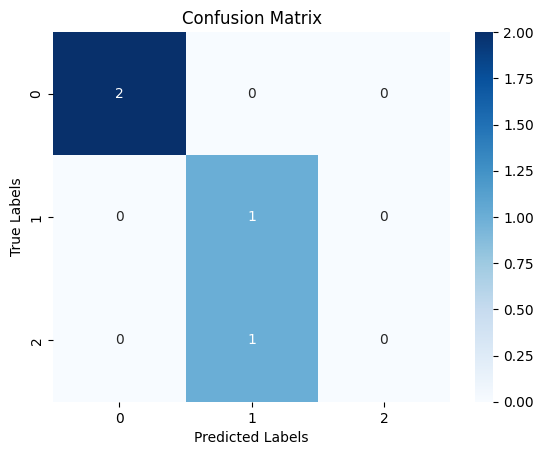

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- Function to calculate evaluation metrics ---
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    return accuracy, precision, recall, f1

# --- Function to plot confusion matrix ---
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()



# Calculate metrics
accuracy, precision, recall, f1 = calculate_metrics(y_true, y_pred)

# Plot confusion matrix
plot_confusion_matrix(y_true, y_pred, labels)
